=== Simplified Credit Risk Analysis ===

Loading data...
Data shape: (307511, 9)

Target distribution:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

Cleaning data...

Performing EDA...


<ipython-input-3-82eeb720fc7c>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['YEARS_EMPLOYED'].fillna(df_clean['YEARS_EMPLOYED'].median(), inplace=True)


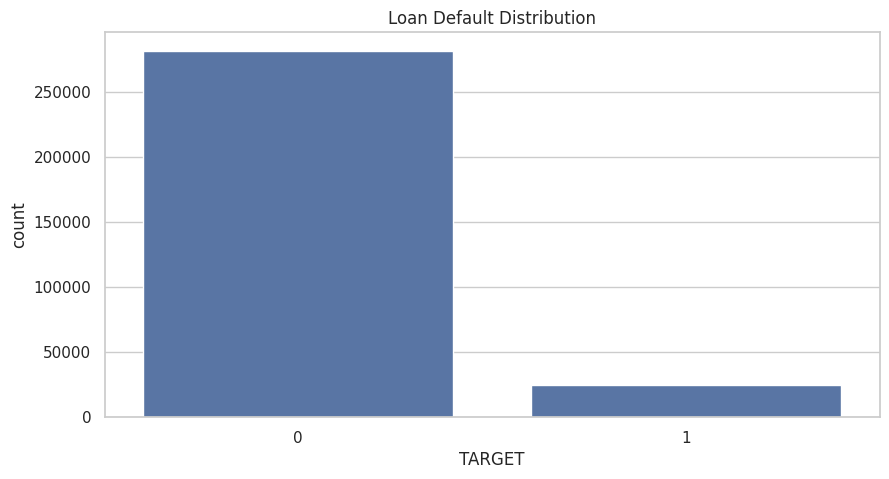

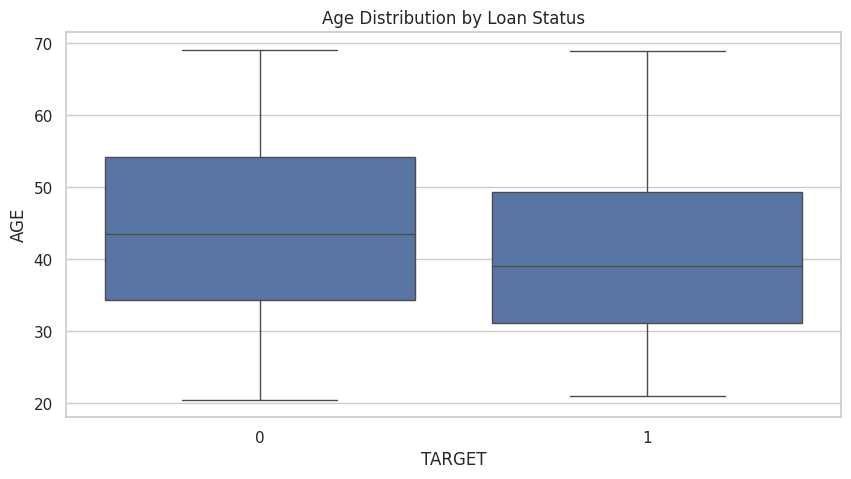

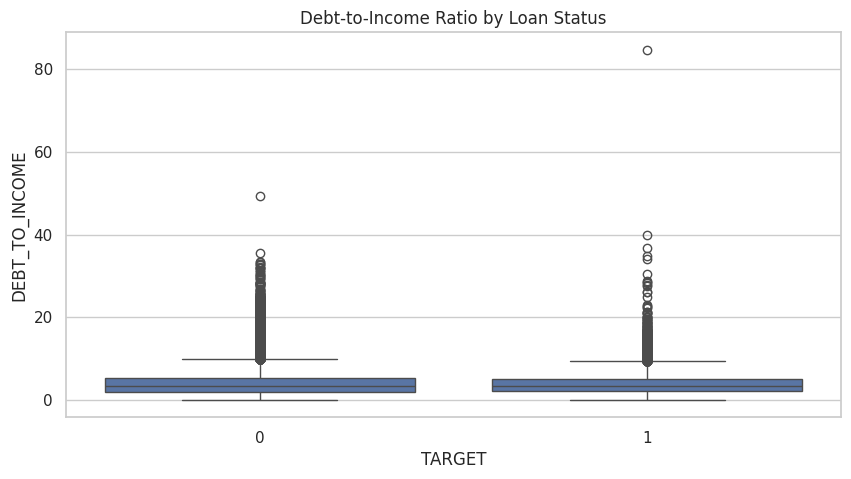

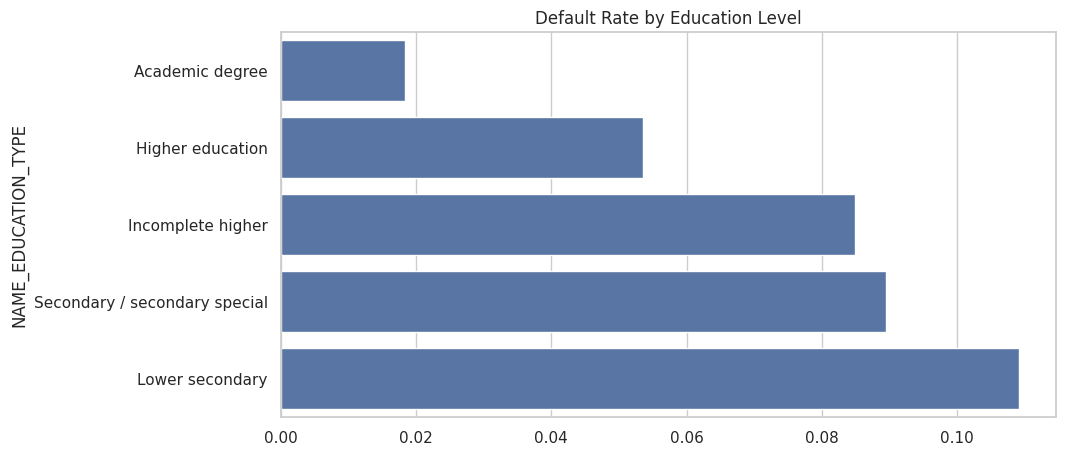


Building model...

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84528
           1       0.34      0.01      0.02      7528

    accuracy                           0.92     92056
   macro avg       0.63      0.50      0.49     92056
weighted avg       0.87      0.92      0.88     92056



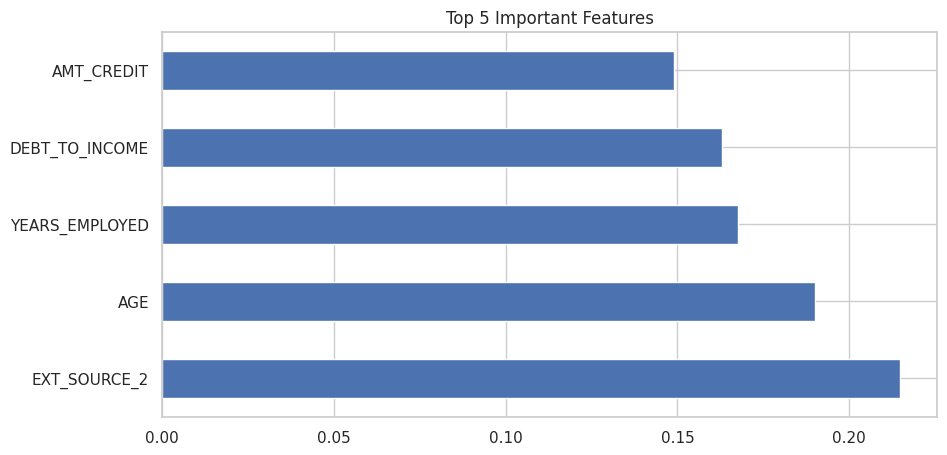


Analysis complete!


In [ ]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# 1. Data Loading & Initial Inspection
def load_and_inspect():
    # Load data (use a smaller sample for demo)
    data = pd.read_csv('application_data.csv')

    # Basic inspection
    print(f"Data shape: {data.shape}")
    print("\nTarget distribution:")
    print(data['TARGET'].value_counts(normalize=True))

    return data

# 2. Data Cleaning
def clean_data(df):
    # Simple cleaning steps
    df_clean = df.copy()

    # Convert days to years
    df_clean['AGE'] = abs(df_clean['DAYS_BIRTH']) / 365
    df_clean['YEARS_EMPLOYED'] = abs(df_clean['DAYS_EMPLOYED']) / 365

    # Handle extreme employment years
    df_clean.loc[df_clean['YEARS_EMPLOYED'] > 50, 'YEARS_EMPLOYED'] = np.nan
    df_clean['YEARS_EMPLOYED'].fillna(df_clean['YEARS_EMPLOYED'].median(), inplace=True)

    # Create simple features
    df_clean['DEBT_TO_INCOME'] = df_clean['AMT_CREDIT'] / df_clean['AMT_INCOME_TOTAL']

    # Select only key columns for simplicity
    keep_cols = ['TARGET', 'AGE', 'YEARS_EMPLOYED', 'DEBT_TO_INCOME',
                 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'CODE_GENDER',
                 'NAME_EDUCATION_TYPE', 'EXT_SOURCE_2']

    return df_clean[keep_cols].dropna()

# 3. Exploratory Data Analysis
def perform_eda(df):
    # Target distribution
    plt.figure()
    sns.countplot(x='TARGET', data=df)
    plt.title('Loan Default Distribution')
    plt.show()

    # Age vs Default
    plt.figure()
    sns.boxplot(x='TARGET', y='AGE', data=df)
    plt.title('Age Distribution by Loan Status')
    plt.show()

    # Debt-to-Income vs Default
    plt.figure()
    sns.boxplot(x='TARGET', y='DEBT_TO_INCOME', data=df)
    plt.title('Debt-to-Income Ratio by Loan Status')
    plt.show()

    # Education vs Default
    if 'NAME_EDUCATION_TYPE' in df.columns:
        plt.figure(figsize=(10, 5))
        edu_rates = df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values()
        sns.barplot(x=edu_rates.values, y=edu_rates.index)
        plt.title('Default Rate by Education Level')
        plt.show()

# 4. Modeling
def build_model(df):
    # Encode categorical variables
    df_model = pd.get_dummies(df, drop_first=True)

    # Split data
    X = df_model.drop('TARGET', axis=1)
    y = df_model['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Simple model
    model = RandomForestClassifier(n_estimators=50, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Feature importance
    plt.figure()
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(5).plot(kind='barh')
    plt.title('Top 5 Important Features')
    plt.show()

# Main execution
def main():
    print("=== Simplified Credit Risk Analysis ===")

    # 1. Load data
    print("\nLoading data...")
    data = load_and_inspect()

    # 2. Clean data
    print("\nCleaning data...")
    clean_df = clean_data(data)

    # 3. EDA
    print("\nPerforming EDA...")
    perform_eda(clean_df)

    # 4. Modeling
    print("\nBuilding model...")
    build_model(clean_df)

    print("\nAnalysis complete!")

if __name__ == "__main__":
    main()

In [1]:
!jupyter nbconvert --to html /content/drive/MyDrive/Colab Notebooks/Ml_project.ipynb


[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Colab' matched no files
[NbConvertApp] WARNING | pattern 'Notebooks/Ml_project.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any quest